<a href="https://colab.research.google.com/github/gmazzitelli/studenti/blob/master/esempio2_fit_Pianeti.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#
# inzializzazione delle funzioni (librerie) usate nel notebook
#
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score
from scipy.stats import chisquare
plt.rc('font', size = 14, family ='Sans-Serif')

# https://it.wikipedia.org/wiki/Pianeti_del_sistema_solare


In [ ]:
# https://docs.google.com/spreadsheets/d/1jad2bmnnV3LHrI-8Auhn3EZrM6kxX_bWvBQDJ91vg08/edit?usp=sharing
key="1jad2bmnnV3LHrI-8Auhn3EZrM6kxX_bWvBQDJ91vg08"
url_csv_file = "https://docs.google.com/spreadsheet/ccc?key="+key+"&output=csv"
df = pd.read_csv(url_csv_file)
df = df.set_index('info').T
df

info,Distanza media dal Sole\nin km,Distanza media dal Sole\nin UA,Raggio medio (in km)\nRapportato alla Terra,Volume rapportato\nalla Terra,Massa (in kg),Densità media (× 103 kg/m3),Accelerazione di gravità all'equatore (m/s2),Velocità di fuga (m/s),Periodo di rotazione siderale (giorni),Periodo orbitale\n(anni giuliani),Velocità orbitale media (km/s),Eccentricità,Inclinazione,Inclinazione assiale,Temperatura superficiale media (in K),Temperatura atmosferica al livello del mare (in K),Composizione atmosferica,Satelliti naturali,Anelli planetari
Mercurio,5.79E+07,0.39,"2439,64\n0,3825",56,3.33E+23,5.43,3.7,4.25E+03,58.79,"2,408,467",47.36,"20,563,069","7,00487°","0,0°",440,-,-,0,No
Venere,1.08E+08,0.72,"6051,59\n0,9488",857,4.87E+24,5.24,8.87,1.04E+04,-243.69,"61,519,726",35.02,"677,323","3,39471°","177,3°",737,-,"CO2, N2",0,No
Terra,1.50E+08,1.00,"6378,15\n1,0000","10,000",5.97E+24,5.51,9.81,1.12E+04,1.00,"10,000,174",29.79,"1,671,123","0,00005°","23,45°",288 - 293,288,"N2, O2",1,No
Marte,2.28E+08,1.52,"3397,00\n0,53226",149,6.42E+23,3.94,3.71,5.02E+03,1.03,"18,808,476",24.13,"9,341,233","1,85061°","25,19°",186 - 268,-,"CO2, N2, Ar",2,No
Giove,7.78E+08,5.20,"71492,68\n11,209",1316,1.90E+27,1.33,23.12,5.95E+04,0.41,"11,862,615",13.07,"4,839,266","1,30530°","3,12°",152,NaN,"H2, He",79,Sì
Saturno,1.43E+09,9.54,"60267,14\n9,449",755,5.69E+26,0.70,8.96,3.55E+04,0.44,"29,447,498",9.67,"5,415,060","2,48446°","26,73°",143,135,"H2, He",82,Sì
Urano,2.87E+09,19.19,"25557,25\n4,007",52,8.68E+25,1.30,8.69,2.13E+04,-0.72,"84,016,846",6.84,"4,716,771","0,76986°","97,86°",68,76,"H2, He, CH4",27,Sì
Nettuno,4.50E+09,30.07,"24766,36\n3,883",44,1.02E+26,1.76,11,2.37E+04,0.67,"16,479,132",5.48,"858,587","1,76917°","29,58°",53,73,"H2, He, CH4",14,Sì


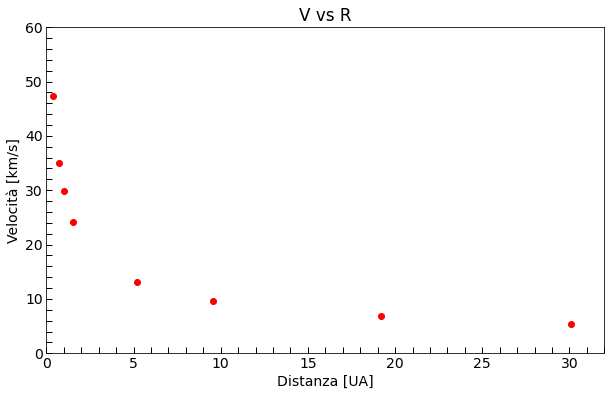

In [ ]:
#
# Visualizziamo i dati
#
fig, ax = plt.subplots(figsize=(10,6))
y = v = np.double(df['Velocità di fuga (m/s)'])/1000
y = v = np.double(df['Velocità orbitale media (km/s)'])
x = r = np.double(df['Distanza media dal Sole\nin UA'])
vr = np.sqrt(np.double(df['Massa (in kg)'])/r)

ax.plot(x,y,'ro')
ax.set_xlim(0,32)
ax.set_ylim(0,60)
ax.set_ylabel('Velocità [km/s]')
ax.set_xlabel(r'Distanza [UA]')
plt.title('V vs R')
# for k in range(x.size):
#    plt.annotate(df['info'][k], (r[k],v[k]),fontsize=12)
plt.minorticks_on()
#plt.grid()
plt.tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
                grid_color='grey', grid_alpha=0.5)
plt.show()

Un pianeta ruota attorno al sole in modo stabile quando vien bilancita la forza gravitazionle attraveso la forze centripeda

$F_g = \frac{G M_{s} m_{p}}{r^2} ; F_c = m_p \omega^2 r$; $\omega = \frac{v}{r}$

$ m_p (\frac{v}{r})^2 r = \frac{G M_{s} m_{p}}{r^2}$ 

$ v^2 = \frac{G M_{s} }{r}$

$v = \sqrt{\frac{G M_s}{r}}$

G = $6.67 \times 10^{-11}$ [N m2/kg2]

$M_s$ = Massa del Sole

$m_p$ = Massa Pianeta

[info](http://comet.iaps.inaf.it/wp-content/uploads/2018-dispense-LeggiKeplero.pdf)


In [ ]:
#
# Modello terico generico per un andamento simile a quello aspettato
#
def vVSrm(x,m,q):
  import numpy as np
  return np.sqrt(m/x)+q

In [ ]:
#
# esguiamo il fit con la funzione che abbiamo scelto come modello con i minimi quadrati
# https://it.wikipedia.org/wiki/Metodo_dei_minimi_quadrati
# 
par, cov = curve_fit(vVSrm, x, y, p0=[0.01,0])
err  = np.sqrt(np.diag(cov))
r2   = r2_score(y , vVSrm(x, *par)) # https://it.wikipedia.org/wiki/Coefficiente_di_determinazione
chi2 = chisquare(y, vVSrm(x, *par)) # https://it.wikipedia.org/wiki/Test_chi_quadrato
print(r'p0 = {0:.2f} ± {1:.2f} p1 = {2:.1f} ± {3:.1f} r2 = {4:.4f} chi2 = {5:.5f}'.format(par[0], err[0], par[1], err[1], r2, chi2[0]))
#print (r2, chi2, par)

p0 = 874.50 ± 2.98 p1 = 0.1 ± 0.0 r2 = 1.0000 chi2 = 0.00100


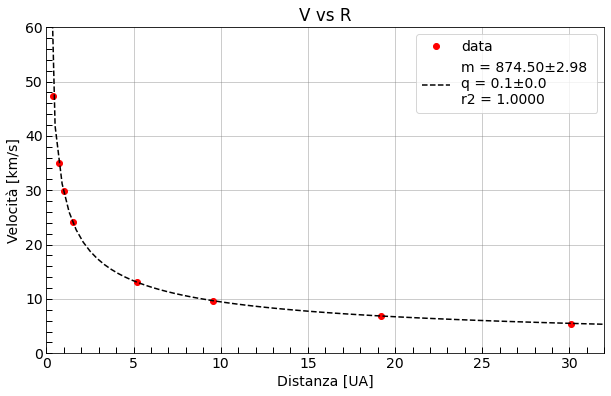

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))

y = v = np.double(df['Velocità orbitale media (km/s)'])
x = r = np.double(df['Distanza media dal Sole\nin UA'])

ax.plot(x,y,'ro', label='data')

x=np.linspace(0.1,40,100)
ax.plot(x,vVSrm(x, *par), 'k--',
        label='m = {0:.2f}±{1:.2f} \nq = {2:.1f}±{3:.1f} \nr2 = {4:.4f}'.format(par[0], err[0], par[1], err[1], r2))
#ax.plot(r,vVSrm(r,m))
ax.set_ylabel('Velocità [km/s]')
ax.set_xlabel(r'Distanza [UA]')
ax.set_xlim(0,32)
ax.set_ylim(0,60)
plt.title('V vs R')
plt.minorticks_on()
plt.grid()
plt.tick_params(axis="both", direction='in', which="both", length=6, width=1, colors='k',
               grid_color='grey', grid_alpha=0.5)
plt.legend()
plt.show()

In [ ]:
# 1,989 × 10^30 kg
M = (874.50/6.67e-11)*1.496e+11*(1e3)**2 # UA vs m, km^2 vs m^2
Merr = (2.98/6.67e-11)*1.496e+11*(1e3)**2
print ('M_s = {0:.4e} ± {1:.1e}'.format(M, Merr))

M_s = 1.9614e+30 ± 6.7e+27


**per stimare le velocita' quando non "vediamo direttamnte" usiamo l'effetto doppler**


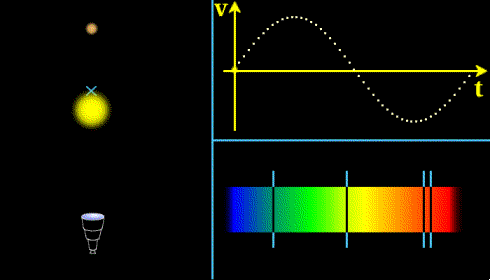
**ma se guradiamo alla Rotazione dele Galassie noi non vediamo un decadimento della velocita' come con i pianeti del nostro sistema solare...**
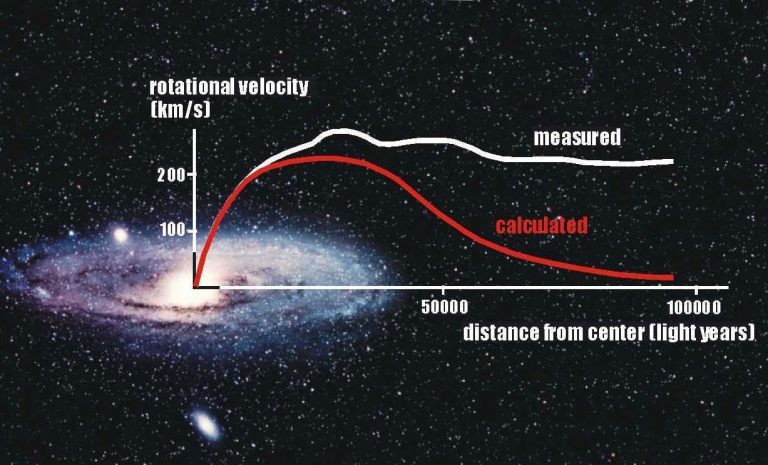



$v = \sqrt{\frac{G M(r)}{r}}$

$  M(r) = 4 \pi \int \rho (r)~r^2 ~dr$ 

---


G = $6.67 \times 10^{-11}$ [N m2/kg2]

$M(r)$ = Massa Galassia

